# Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Thu thập dữ liệu

- Dữ liệu nhóm thu thập về chủ đề âm nhạc cụ thể là các bài hát hàng đầu trên Spotify từ 2010-2019 và được tính theo năm. Tập dữ liệu này có một số biến về các bài hát và dựa trên Billboard. Dữ liệu được nhóm lấy từ trang Kaggle ([link data](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year)).
- Ở mục `Metadata` thì Visibility là Public nên ta có thể sử dụng dữ liệu này để  phục vụ cho mục đích học tập.
- Dữ liệu được người ta lấy từ lấy từ: http://organizeyourmusic.playlistmachinery.com/. Các bước lấy dữ liệu được hướng dẫn chi tiết [ở đây](https://www.youtube.com/watch?v=NGY1cthhr5g&ab_channel=PaulLamere). Người thu thập dữ liệu đã bỏ đi 2 cột không cần thiết ở tập dữ liệu gốc.

# Khám phá dữ liệu

## Đọc dữ liệu từ file csv vào dataframe

In [2]:
top_songs_df = pd.read_csv('Data/top10s.csv', index_col="Unnamed: 0")
top_songs_df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
top_songs_df.shape

(603, 14)

Dữ liệu có 603 dòng và 14 cột

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả của dữ liệu và quan sát sơ về dữ liệu thì mỗi dòng cho biết thông tin của một bài hát hàng đầu trên Spotify

Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau

## Dữ liệu có các dòng bị lặp không?

In [4]:
top_songs_df.duplicated().sum()

0

Dữ liệu không có các dòng bị lặp

## Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả dữ liệu:
1. **title**: Song's title
2. **artist**: Song's artist
3. **top genre**: The genre of the track
4. **year**: The release year of the recording. Note that due to vagaries of releases, re-releases, re-issues and general madness, sometimes the release years are not what you'd expect.
5. **bpm**: The tempo of the song.
6. **nrgy**: The energy of a song - the higher the value, the more energtic song.
7. **dnce**: The higher the value, the easier it is to dance to this song.
8. **dB**: The higher the value, the louder the song.
9. **live**: The higher the value, the more likely the song is a live recording.
10. **val**: The higher the value, the more positive mood for the song.
11. **dur**: The duration of the song.
12. **acous**: The higher the value the more acoustic the song is.
13. **spch**: The higher the value the more spoken word the song contains.
14. **pop**: The higher the value the more popular the song is.

## Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [5]:
top_songs_df.dtypes

title        object
artist       object
top genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object

Có hai loại kiểu dữ liệu, đó là:

- Categorical
- Numerical

Ta thấy các cột đã có kiểu dữ liệu phù hợp nên không cần xửa lý gì cả.

## Với mỗi cột có kiểu dữ liệu dạng số (numeric), các giá trị được phân bố như thế nào?

In [6]:
def missing_ratio(s):
    return s.isna().mean() * 100
num_col = top_songs_df.select_dtypes(np.int64).columns
top_songs_df[num_col].agg([missing_ratio, min, max])

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2010.0,0.0,0.0,0.0,-60.0,0.0,0.0,134.0,0.0,0.0,0.0
max,2019.0,206.0,98.0,97.0,-2.0,74.0,98.0,424.0,99.0,48.0,99.0


Min và max của các cột không có gì bất thường.

## Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

In [7]:
cate_col = set(top_songs_df.columns) - set(num_col)
top_songs_df[cate_col].agg([missing_ratio, pd.Series.nunique, pd.Series.unique])\
                      .rename(index={'nunique': 'num_diff_vals', 'unique':'diff_vals'})

,top genre,title,artist
missing_ratio,0.0,0.0,0.0
num_diff_vals,50,584,184
diff_vals,"[neo mellow, detroit hip hop, dance pop, pop, ...","[Hey, Soul Sister, Love The Way You Lie, TiK T...","[Train, Eminem, Kesha, Lady Gaga, Bruno Mars, ..."


# Đưa ra các câu hỏi có ý nghĩa cần trả lời

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:

- Câu hỏi 1: Chỉ số phổ biến của mỗi thể loại âm nhạc thay đổi như thế nào qua các năm?
    
    Ý nghĩa: Tác giả sẽ thấy được xu hướng thể loại âm nhạc để sáng tác cho phù hợp.
    
    
- Câu hỏi 2: Xu hướng các biến của bài hát như thế nào qua các năm? 

    Ý nghĩa: Khi trả lời được câu hỏi này thì tác giả dựa trên các xu hướng đó sẽ nắm bắt xu hướng của thị trường âm nhạc, nên có lợi thế sáng tác được những bài hát phù hợp với thị trường, người nghe nhiều hơn. Hoặc tác giả có thể sáng tác bài hát có đặc điểm khác biệt nếu được người nghe ủng hộ thì từ đó tạo ra bước chạy đà cho một xu hướng âm nhạc mới.

# Tiền xử lý + phân tích dữ liệu để trả lời cho từng câu hỏi

## Chỉ số phổ biến của mỗi thể loại âm nhạc thay đổi như thế nào qua các năm?

## Xu hướng các biến của bài hát như thế nào qua các năm?

### Tiền xử lý

Đối với mỗi năm thì ta sẽ tính trung bình giá trị các biến của bài hát bao gồm: `bpm`, `nrgy`, `dnce`, `dB`, `live`, `val`, `dur`, `acous`, `spch`. Lưu kết quả vào `mean_variables_songs` với index là các năm, các cột là các biến của bài hát.

In [8]:
mean_variables_songs = top_songs_df.groupby('year')[num_col[1:-1]].mean()
mean_variables_songs

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
year,,,,,,,,,
2010,122.058824,77.901961,64.529412,-4.901961,21.176471,57.000000,229.803922,11.627451,8.882353
2011,119.075472,74.886792,63.641509,-5.018868,20.943396,53.698113,242.566038,13.339623,9.660377
2012,121.085714,75.485714,65.714286,-4.857143,15.828571,64.171429,224.400000,4.857143,5.800000
2013,121.676056,73.873239,62.042254,-5.140845,19.718310,53.183099,234.492958,10.323944,8.309859
2014,123.000000,67.775862,62.534483,-5.775862,17.293103,52.086207,224.155172,17.551724,8.672414
2015,119.768421,70.336842,63.663158,-5.621053,18.305263,52.526316,223.368421,16.600000,7.052632
2016,114.325000,67.237500,63.325000,-6.712500,17.737500,45.150000,220.225000,15.875000,8.362500
2017,116.800000,69.169231,65.369231,-5.615385,15.369231,52.276923,222.169231,16.600000,9.784615
2018,114.593750,65.468750,67.203125,-5.671875,14.750000,48.765625,217.187500,12.781250,8.625000


### Phân tích dữ liệu

Từ kết quả ở trên, vẽ 9 đồ thị dạng line, trong đó trục hoành là năm và trục tung với mỗi biểu đồ  là giá trị trung bình 1 biến của bài hát. Dùng thêm marker là điểm tròn để cho thấy rõ các điểm dữ liệu. Đặt tên trục hoành là "Year" và tên trục tung là các biến của bài hát.

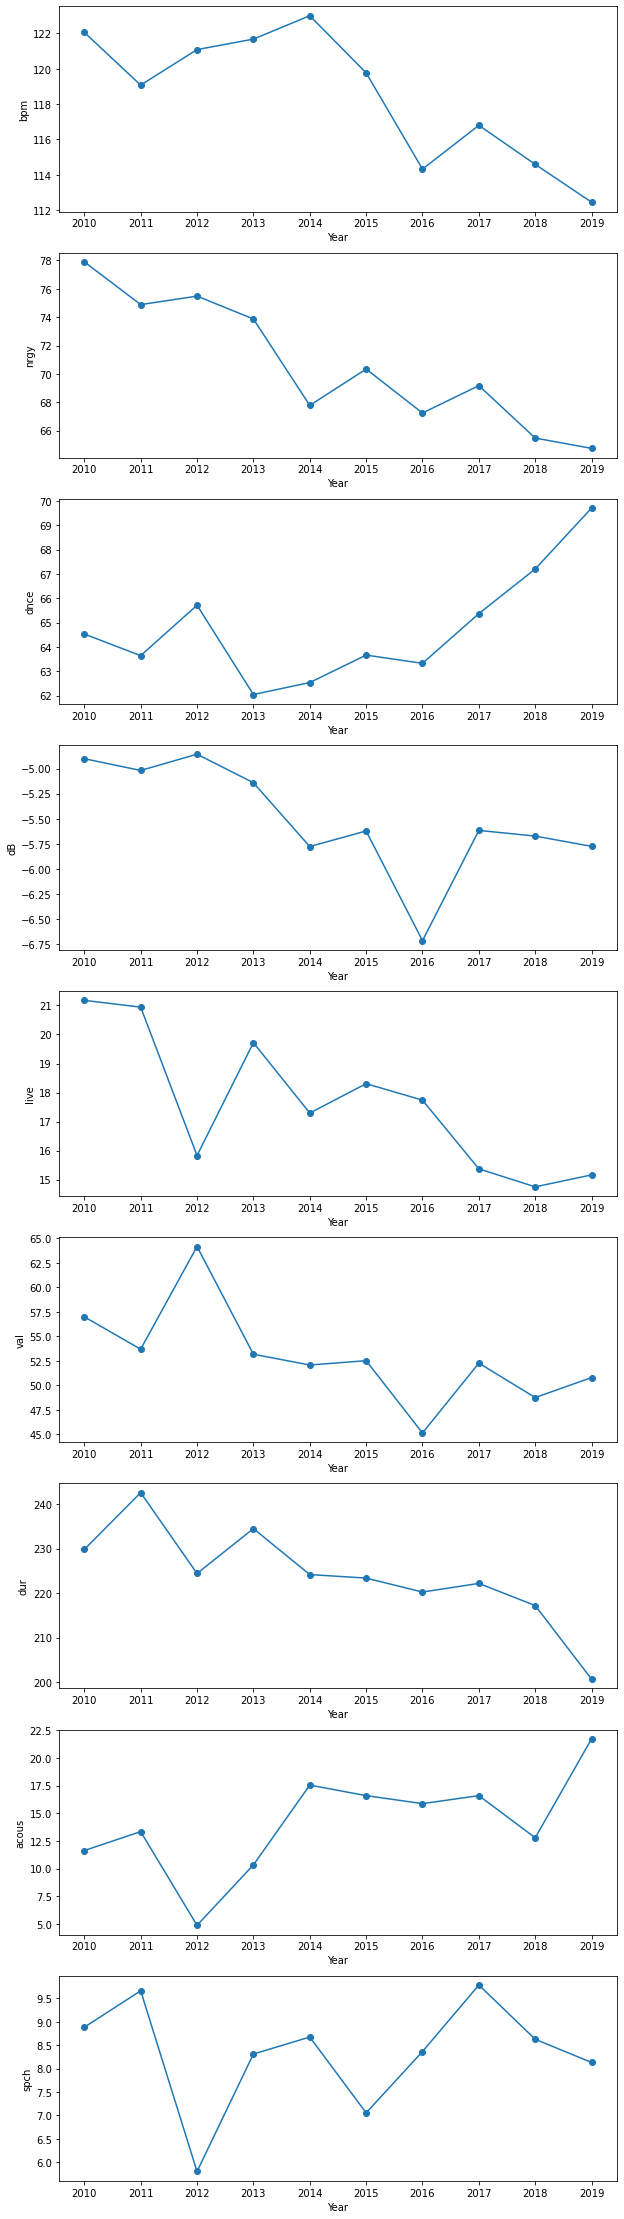

In [9]:
fig, axes = plt.subplots(nrows=len(num_col[1:-1]), ncols=1, figsize=(10,40))
for col, ax in zip(num_col[1:-1], axes):
    ax.plot(mean_variables_songs.index, mean_variables_songs[col], marker='o')
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    ax.set_xticks(np.arange(2010,2020))

Dựa vào các biểu đồ ta có những nhận xét sau:
- Beats Per Minute (BPM) của các bài hát đã giảm trong những năm qua.
- Energy của các bài hát ngày càng ít hơn.
- Các bài hát trong những năm gần đây dễ nhảy hơn.
- Có một chút giảm âm lượng của các bài hát, ám chỉ rằng khán giả thích những bài hát ít ồn ào hơn.
- Khả năng bài hát là bản ghi âm trực tiếp giảm rõ rệt trong những năm gần đây.
- Những năm đầu thì các bài hát vui vẻ, về sau thì độ vui vẻ giảm đi một chút.
- Thời lượng của các bài hát từ năm 2018 trở đi giảm mạnh.
- Nhạc acoustic đang là một xu thế, tăng mạnh trong những năm gần đây.
- Lời baì hát ít ca từ hơn trong những 2 năm gần đây nhưng không thay đổi nhiều

Nói chung, các bài hit ngày càng chậm hơn, ít năng lượng hơn, dễ nhảy hơn, nhỏ hơn một chút, vui hơn một chút, ngắn hơn, acoustic hơn, với ít ca từ hơn!

# Nhìn lại quá trình làm đồ án

+ Khó khăn:
  -
+ Những thứ học được:
  - Các bước làm hoàn chỉnh trong việc ứng dụng quy trình Khoa học dữ liệu vào bài toán thực tế.
  - Kỹ năng làm việc nhóm.
  - Làm việc với các tính năng nâng cao trên Github.

# Tài liệu tham khảo

https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

http://organizeyourmusic.playlistmachinery.com/